# "Sales Data Analysis and Predictive Modeling for Business Insights"

# Problem Statement and Data Description

**Problem Statement**:The goal of this project is to analyze the sales data to uncover patterns and insights that can inform business decisions. This includes understanding the performance of different products, identifying sales trends by region, and exploring customer payment preferences.

**Data Description**:

- **Transaction ID**: Unique identifier for each transaction.

- **Date**: The date when the transaction occurred.

- **Product Category**: Category of the product sold (e.g., electronics, clothing).

- **Product Name**: The specific name of the product.

- **Units Sold**: The number of units sold in the transaction.

- **Unit Price**: The price per unit of the product.

- **Total Revenue**: The total revenue generated from the transaction (Units Sold * Unit Price).

- **Region**: The geographic region where the transaction took place.

- **Payment Method**: The method used by the customer to pay for the transaction (e.g., credit card, cash).

# Loading Required Libraries and Datasets

In [3]:
#Importing required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv(r"C:\Users\user\Downloads\Online Sales Data.csv")

In [5]:
# Display the first 5 records
data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [54]:
# Display the last 5 records
data.tail()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal
239,10240,2024-08-27,Sports,Yeti Rambler 20 oz Tumbler,2,29.99,59.98,Asia,Credit Card


In [55]:
data.shape

(240, 9)

In [56]:
data.columns

Index(['Transaction ID', 'Date', 'Product Category', 'Product Name',
       'Units Sold', 'Unit Price', 'Total Revenue', 'Region',
       'Payment Method'],
      dtype='object')

In [6]:
#Information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


# Data Preprocessing

In [58]:
#Checking the null values
print(data.isnull().sum())

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64


In [59]:
#Basic statistics for numerical columns
print(data.describe())

       Transaction ID  Units Sold   Unit Price  Total Revenue
count       240.00000  240.000000   240.000000     240.000000
mean      10120.50000    2.158333   236.395583     335.699375
std          69.42622    1.322454   429.446695     485.804469
min       10001.00000    1.000000     6.500000       6.500000
25%       10060.75000    1.000000    29.500000      62.965000
50%       10120.50000    2.000000    89.990000     179.970000
75%       10180.25000    3.000000   249.990000     399.225000
max       10240.00000   10.000000  3899.990000    3899.990000


In [60]:
# Examine unique values for categorical columns
print(data['Product Category'].unique())
print(data['Region'].unique())
print(data['Payment Method'].unique())

['Electronics' 'Home Appliances' 'Clothing' 'Books' 'Beauty Products'
 'Sports']
['North America' 'Europe' 'Asia']
['Credit Card' 'PayPal' 'Debit Card']


In [61]:
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [62]:
# Extract the month from the 'Date'
data['Month'] = data['Date'].dt.month

In [63]:
# Fix revenue mismatches
data['Calculated Revenue'] = data['Units Sold'] * data['Unit Price']
data.loc[data['Total Revenue'] != data['Calculated Revenue'], 'Total Revenue'] = data['Calculated Revenue']
data.drop(columns='Calculated Revenue', inplace=True)

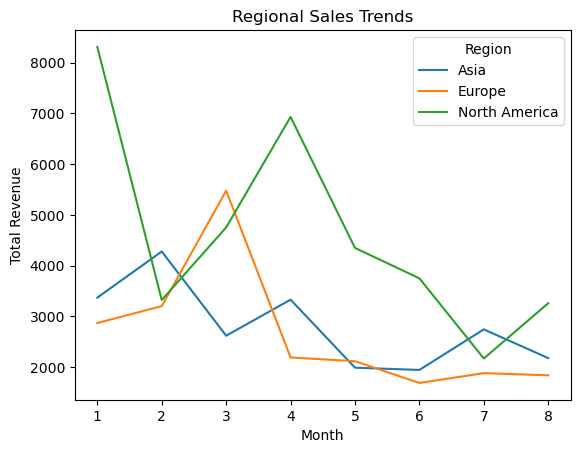

In [64]:
# Regional Sales Trends
regional_trends = data.groupby(['Region', 'Month'])['Total Revenue'].sum().reset_index()
sns.lineplot(data=regional_trends, x='Month', y='Total Revenue', hue='Region')
plt.title('Regional Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

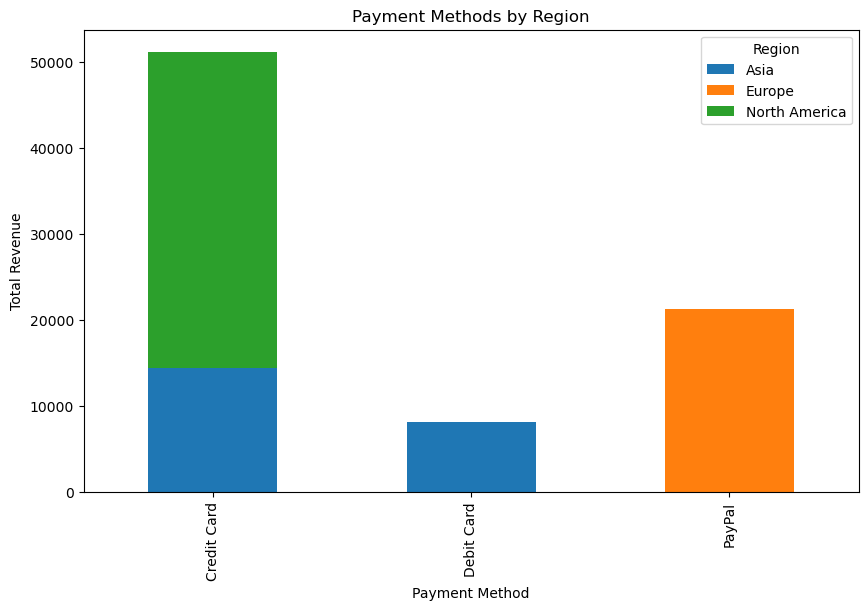

In [65]:
# Payment Method Preferences by Region
payment_preferences = data.groupby(['Payment Method', 'Region'])['Total Revenue'].sum().unstack()
payment_preferences.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Payment Methods by Region')
plt.ylabel('Total Revenue')
plt.xlabel('Payment Method')
plt.legend(title='Region')
plt.show()

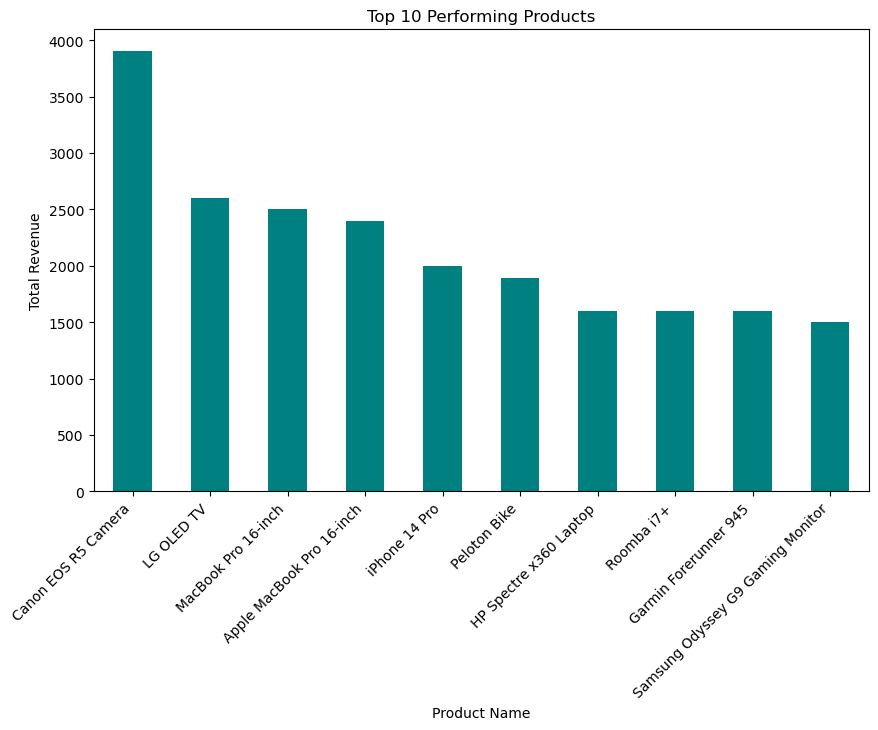

In [66]:
# Top Performing Products
top_products = data.groupby('Product Name')['Total Revenue'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', color='teal', figsize=(10, 6))
plt.title('Top 10 Performing Products')
plt.ylabel('Total Revenue')
plt.xlabel('Product Name')
plt.xticks(rotation=45, ha='right')
plt.show()

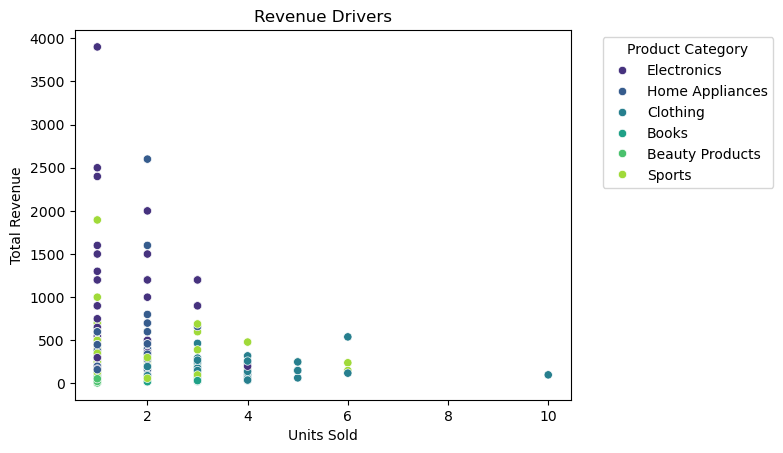

In [67]:
# Revenue Drivers (Units Sold vs Total Revenue by Product Category)
sns.scatterplot(data=data, x='Units Sold', y='Total Revenue', hue='Product Category', palette='viridis')
plt.title('Revenue Drivers')
plt.xlabel('Units Sold')
plt.ylabel('Total Revenue')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

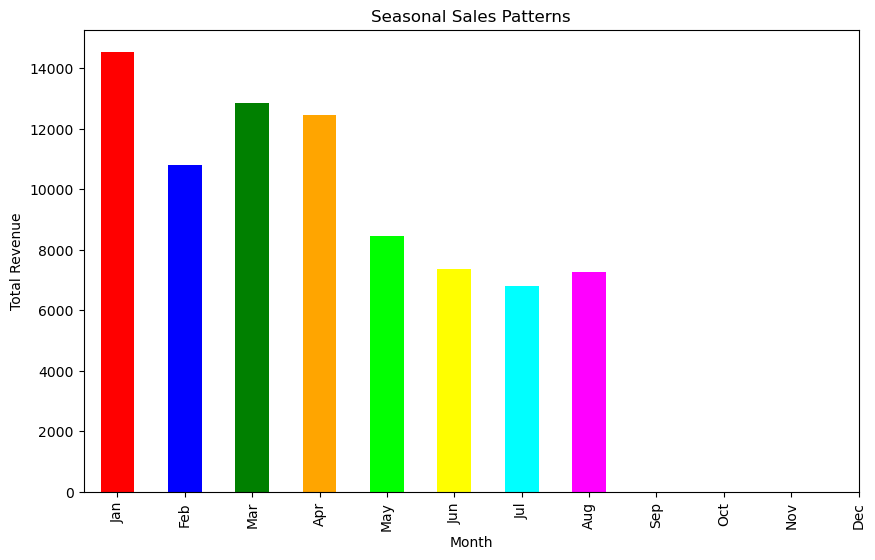

In [80]:
# Seasonal Sales Patterns
monthly_revenue = data.groupby('Month')['Total Revenue'].sum()
monthly_revenue.plot(kind='bar', color=['red', 'blue', 'green', 'orange', 'lime', 'yellow', 'cyan', 'magenta', 'brown', 'pink'], figsize=(10, 6))
plt.title('Seasonal Sales Patterns')
plt.ylabel('Total Revenue')
plt.xlabel('Month')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

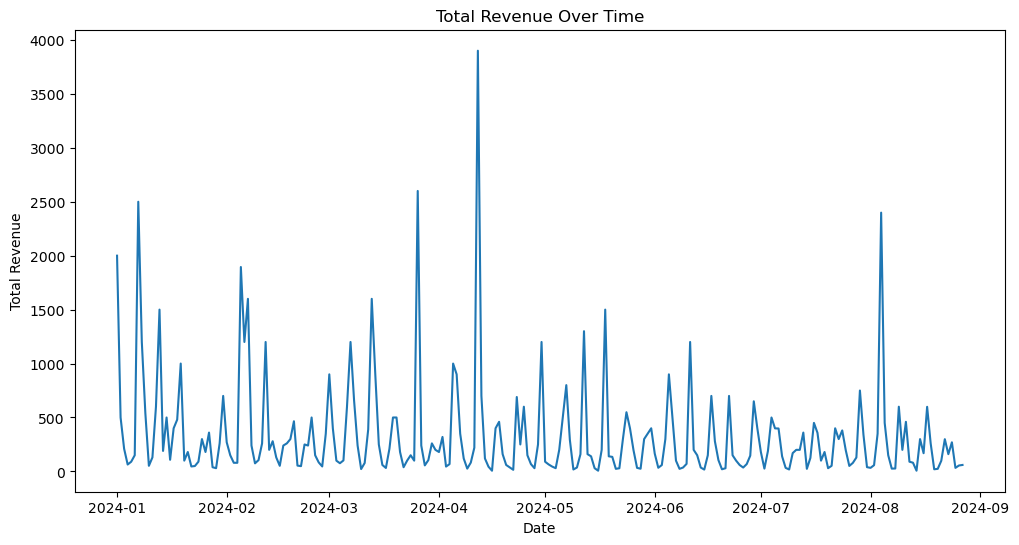

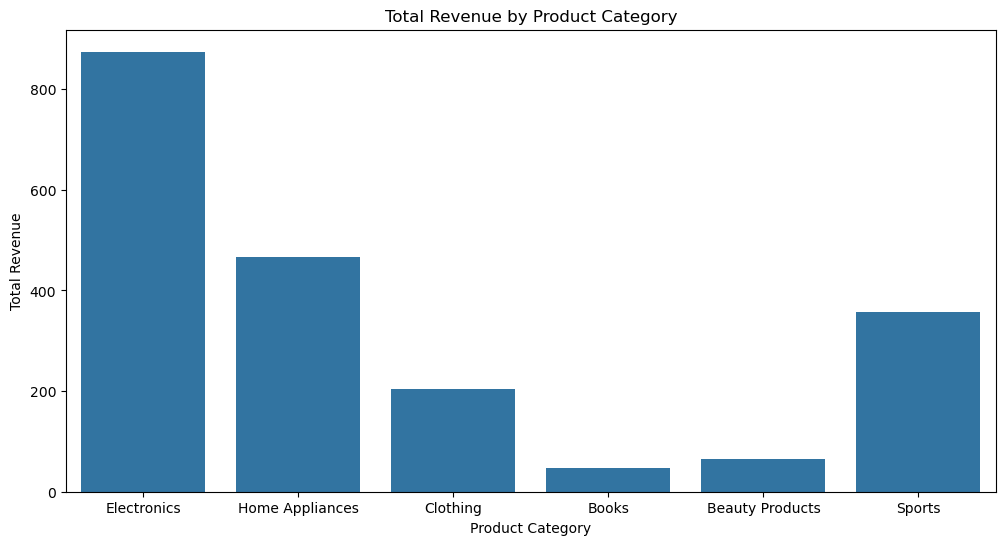

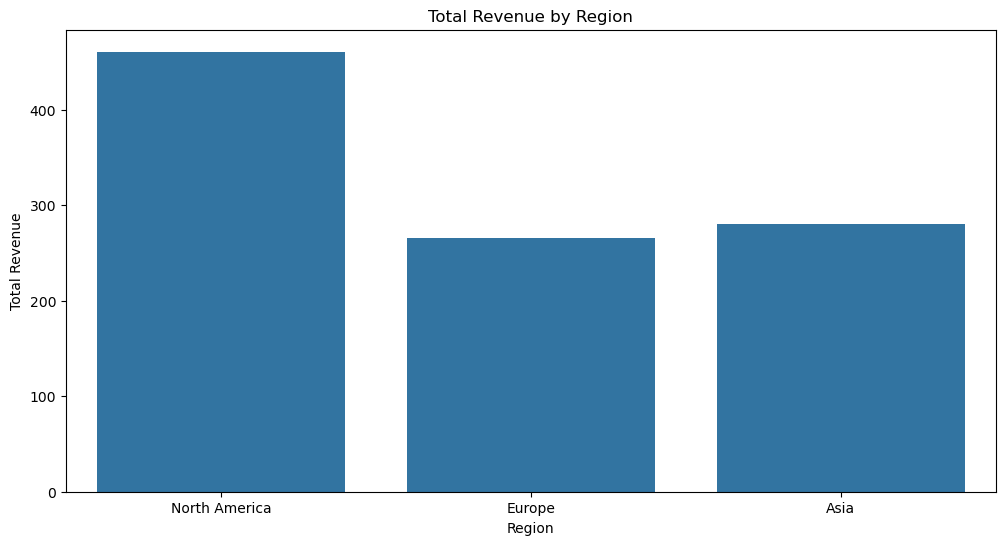

In [69]:
# Sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Date', y='Total Revenue',)
plt.title('Total Revenue Over Time')
plt.show()

# Sales by product category
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Product Category', y='Total Revenue', errorbar=None)
plt.title('Total Revenue by Product Category')
plt.show()

# Sales by region
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Region', y='Total Revenue', errorbar=None)
plt.title('Total Revenue by Region')
plt.show()

In [70]:
# Summary Statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       Transaction ID                 Date  Units Sold   Unit Price  \
count       240.00000                  240  240.000000   240.000000   
mean      10120.50000  2024-04-29 12:00:00    2.158333   236.395583   
min       10001.00000  2024-01-01 00:00:00    1.000000     6.500000   
25%       10060.75000  2024-02-29 18:00:00    1.000000    29.500000   
50%       10120.50000  2024-04-29 12:00:00    2.000000    89.990000   
75%       10180.25000  2024-06-28 06:00:00    3.000000   249.990000   
max       10240.00000  2024-08-27 00:00:00   10.000000  3899.990000   
std          69.42622                  NaN    1.322454   429.446695   

       Total Revenue       Month  
count     240.000000  240.000000  
mean      335.699375    4.458333  
min         6.500000    1.000000  
25%        62.965000    2.750000  
50%       179.970000    4.000000  
75%       399.225000    6.000000  
max      3899.990000    8.000000  
std       485.804469    2.275560  


In [71]:
# Descriptive statistics
data.describe()

,Transaction ID,Date,Units Sold,Unit Price,Total Revenue,Month
count,240.00000,240,240.000000,240.000000,240.000000,240.000000
mean,10120.50000,2024-04-29 12:00:00,2.158333,236.395583,335.699375,4.458333
min,10001.00000,2024-01-01 00:00:00,1.000000,6.500000,6.500000,1.000000
25%,10060.75000,2024-02-29 18:00:00,1.000000,29.500000,62.965000,2.750000
50%,10120.50000,2024-04-29 12:00:00,2.000000,89.990000,179.970000,4.000000
75%,10180.25000,2024-06-28 06:00:00,3.000000,249.990000,399.225000,6.000000
max,10240.00000,2024-08-27 00:00:00,10.000000,3899.990000,3899.990000,8.000000
std,69.42622,NaN,1.322454,429.446695,485.804469,2.275560


# Data Modeling

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [76]:
# Predicting Total Revenue using Linear Regression
features = ['Units Sold', 'Unit Price', 'Month'] 
X = data[features] 
y = data['Total Revenue']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression() 
model.fit(X_train, y_train)

# Predictions 
y_pred = model.predict(X_test)

In [78]:
#Evaluation 
mae = mean_absolute_error(y_test, y_pred) 
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 103.46218174396832


In [79]:
#For simplicity, we print the first 5 predictions
print(y_pred[:5])

[ 448.38343471 2865.58038058  135.04930064  226.16479702  162.51744776]
